In [161]:
from skimage import io, filters, feature
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from scipy import ndimage
import pandas as pd
import string
%matplotlib inline  


In [162]:
images = []
directory = "Alphabet\\"
for i in range(26):
    filename = directory + "alphabet" + str(i) + ".png"
    image = cv.imread(filename, cv.IMREAD_GRAYSCALE)
    height = image.shape[0]
    width = image.shape[1]
    _, image = cv.threshold(image, 128,255, cv.THRESH_BINARY)
    rotate_batch = np.zeros((4, height, width))
    rotate_batch[0] = image
    rotate_batch[1] = np.rot90(rotate_batch[0])
    rotate_batch[2] = np.rot90(rotate_batch[1])
    rotate_batch[3] = np.rot90(rotate_batch[2])
    
    images.append(rotate_batch)
images = np.array(images)

print(images.shape)

(26, 4, 60, 60)


Text(0.5,1,'270°')

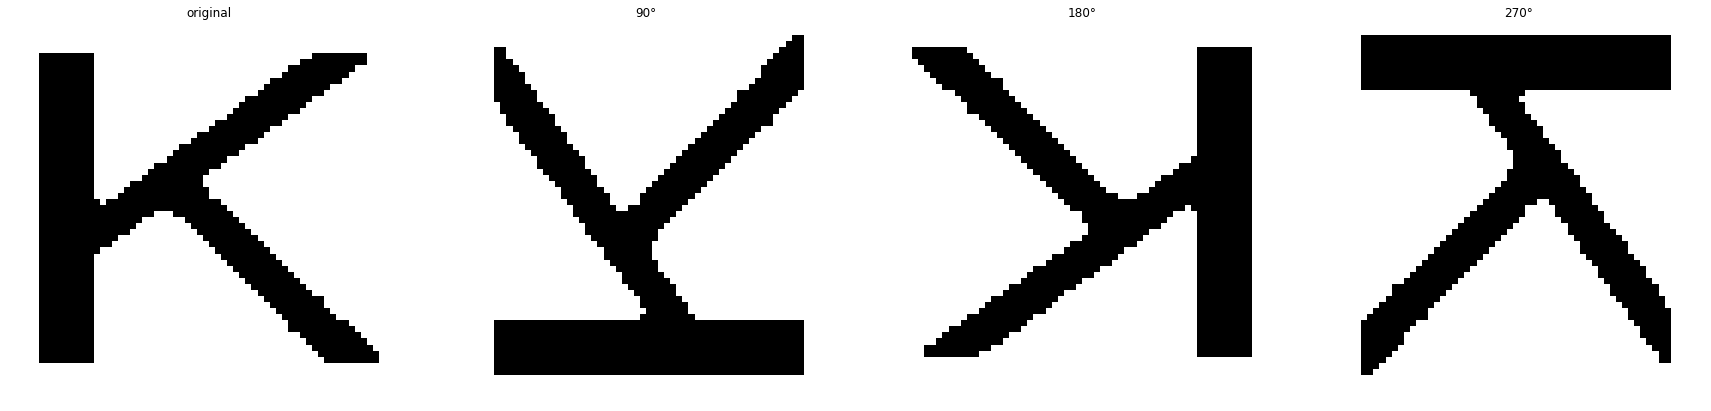

In [163]:
k = images[10]

fig, axs = plt.subplots(1 , 4, figsize = (30, 30))
for i in axs:
    i.axis("off")
 
axs[0].imshow(k[0], cmap = "gray")
axs[1].imshow(k[1], cmap = "gray")
axs[2].imshow(k[2], cmap = "gray")
axs[3].imshow(k[3], cmap = "gray")

axs[0].set_title("original")
axs[1].set_title("90°")
axs[2].set_title("180°")
axs[3].set_title("270°")




In [164]:
col_names = []
hu_moments = np.zeros((26, 7 * 4))
for i in range(26):
    for j in range(4):
        moments =  cv.moments(images[i][j])
        h = cv.HuMoments(moments).reshape((7, ))
        hu_moments[i, j * 7: (j + 1) * 7] = -1 * np.sign(h) * np.log10(np.abs(h)) #I deal with the nans later in dataframe construction
        
for degree in ["_0", "_90", "_180", "_270"]:
    for i in range(7):
        col_names.append("h" + str(i) + degree)
    
        


moments_data = pd.DataFrame(hu_moments, columns=col_names, index = list(string.ascii_letters[:26])).fillna(0)

moments_data.head()


c:\users\aryan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
c:\users\aryan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


,h0_0,h1_0,h2_0,h3_0,h4_0,h5_0,h6_0,h0_90,h1_90,h2_90,...,h4_180,h5_180,h6_180,h0_270,h1_270,h2_270,h3_270,h4_270,h5_270,h6_270
a,3.027872,11.715907,10.985302,13.360575,-25.634336,19.544626,-25.748579,3.027872,11.715907,10.985302,...,-25.634336,19.544626,-25.748579,3.027872,11.715907,10.985302,13.360575,-25.634336,19.544626,-25.748579
b,2.967926,7.933923,11.695207,11.953123,23.779671,-16.013159,-24.758338,2.967926,7.933923,11.695207,...,23.779671,-16.013159,-24.758338,2.967926,7.933923,11.695207,11.953123,23.779671,-16.013159,-24.758338
c,3.079261,9.876598,11.778458,11.812833,-23.608491,-16.751171,-25.744905,3.079261,9.876598,11.778458,...,-23.608491,-16.751171,-25.744905,3.079261,9.876598,11.778458,11.812833,-23.608491,-16.751171,-25.744905
d,3.043400,8.058903,11.338184,13.311235,25.675893,17.496542,26.023237,3.043400,8.058903,11.338184,...,25.675893,17.496542,26.023237,3.043400,8.058903,11.338184,13.311235,25.675893,17.496542,26.023237
e,3.028240,8.684808,11.751986,10.971990,-22.539721,-15.368398,22.440501,3.028240,8.684808,11.751986,...,-22.539721,-15.368398,22.440501,3.028240,8.684808,11.751986,10.971990,-22.539721,-15.368398,22.440501


In [165]:
distances = np.zeros((26, 3))
for i in range(26):
    original_image=  images[i][0]
    for j in range(1,4):
        rotated_image = images[i][j]
        dist = cv.matchShapes(original_image, rotated_image,cv.CONTOURS_MATCH_I2,0)
        distances[i, j - 1] = dist 
        
distances = pd.DataFrame(distances, columns = ["90°", "180°", "270°"], index = list(string.ascii_letters[:26]))


display(distances)

,90°,180°,270°
a,0.000000e+00,0.000000e+00,0.000000e+00
b,0.000000e+00,0.000000e+00,0.000000e+00
c,0.000000e+00,0.000000e+00,0.000000e+00
d,0.000000e+00,0.000000e+00,0.000000e+00
e,0.000000e+00,0.000000e+00,0.000000e+00
f,0.000000e+00,0.000000e+00,0.000000e+00
g,0.000000e+00,0.000000e+00,0.000000e+00
h,0.000000e+00,0.000000e+00,0.000000e+00
i,0.000000e+00,0.000000e+00,0.000000e+00
j,0.000000e+00,0.000000e+00,0.000000e+00
